# INOVAKO Yolov8 CUSTOM OBJECT SEGMENTATION

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


You can access the files below:

https://drive.google.com/drive/folders/1-rRzVUg6v-tN1Q5UAcu_ibYBystRoL9g?usp=share_link



In [61]:
!nvidia-smi

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Wed Aug 23 08:32:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+---------

## Installing Required Packages

In [32]:
!pip install ultralytics

In [33]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/My Drive/inovako_2


In [34]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.160 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

##Inference on pre-trained model

In [36]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='/content/drive/MyDrive/inovako_2/train/images/kivi-1-_jpg.rf.a5b42093403dd42c873b9d552b3db064.jpg' save=true

/content/drive/MyDrive/inovako_2
100% 22.8M/22.8M [00:00<00:00, 127MB/s] 
Ultralytics YOLOv8.0.160 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/inovako_2/train/images/kivi-1-_jpg.rf.a5b42093403dd42c873b9d552b3db064.jpg: 640x640 1 apple, 1 teddy bear, 21.3ms
Speed: 2.8ms preprocess, 21.3ms inference, 148.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


/content/drive/My Drive/inovako_2


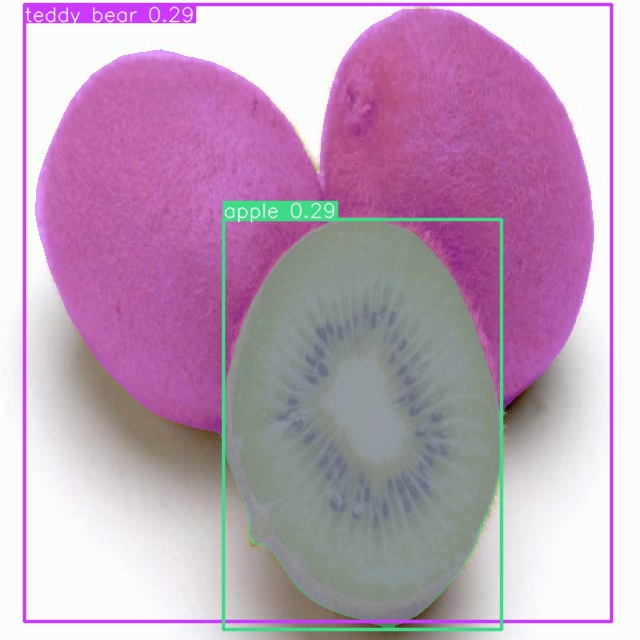

In [37]:
%cd {HOME}
Image(filename='runs/segment/predict/kivi-1-_jpg.rf.a5b42093403dd42c873b9d552b3db064.jpg', height=600)

As it clearly seen pretty bad...

Now I will train the model with custom dataset !

## Training on Custom Dataset

In [38]:
ROOT_PATH = "/content/drive/MyDrive/inovako_2"

In [39]:
!pwd

/content/drive/My Drive/inovako_2


In [40]:
%cd "/content/drive/MyDrive/inovako_2"

/content/drive/MyDrive/inovako_2


In [41]:
!pwd

/content/drive/MyDrive/inovako_2


In [42]:
!ls

data.yaml  runs  test  train  valid  yolov8s-seg.pt


We need to give correct path to the yaml file but I already did that in the drive file.

In [43]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=30 imgsz=640 save=true

Ultralytics YOLOv8.0.160 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fa

In [44]:
!ls runs/segment/train/

args.yaml					     results.csv
BoxF1_curve.png					     results.png
BoxP_curve.png					     train_batch0.jpg
BoxPR_curve.png					     train_batch1.jpg
BoxR_curve.png					     train_batch2.jpg
confusion_matrix_normalized.png			     train_batch660.jpg
confusion_matrix.png				     train_batch661.jpg
events.out.tfevents.1692778249.a0b9ed0f196e.12469.0  train_batch662.jpg
labels_correlogram.jpg				     val_batch0_labels.jpg
labels.jpg					     val_batch0_pred.jpg
MaskF1_curve.png				     val_batch1_labels.jpg
MaskP_curve.png					     val_batch1_pred.jpg
MaskPR_curve.png				     weights
MaskR_curve.png


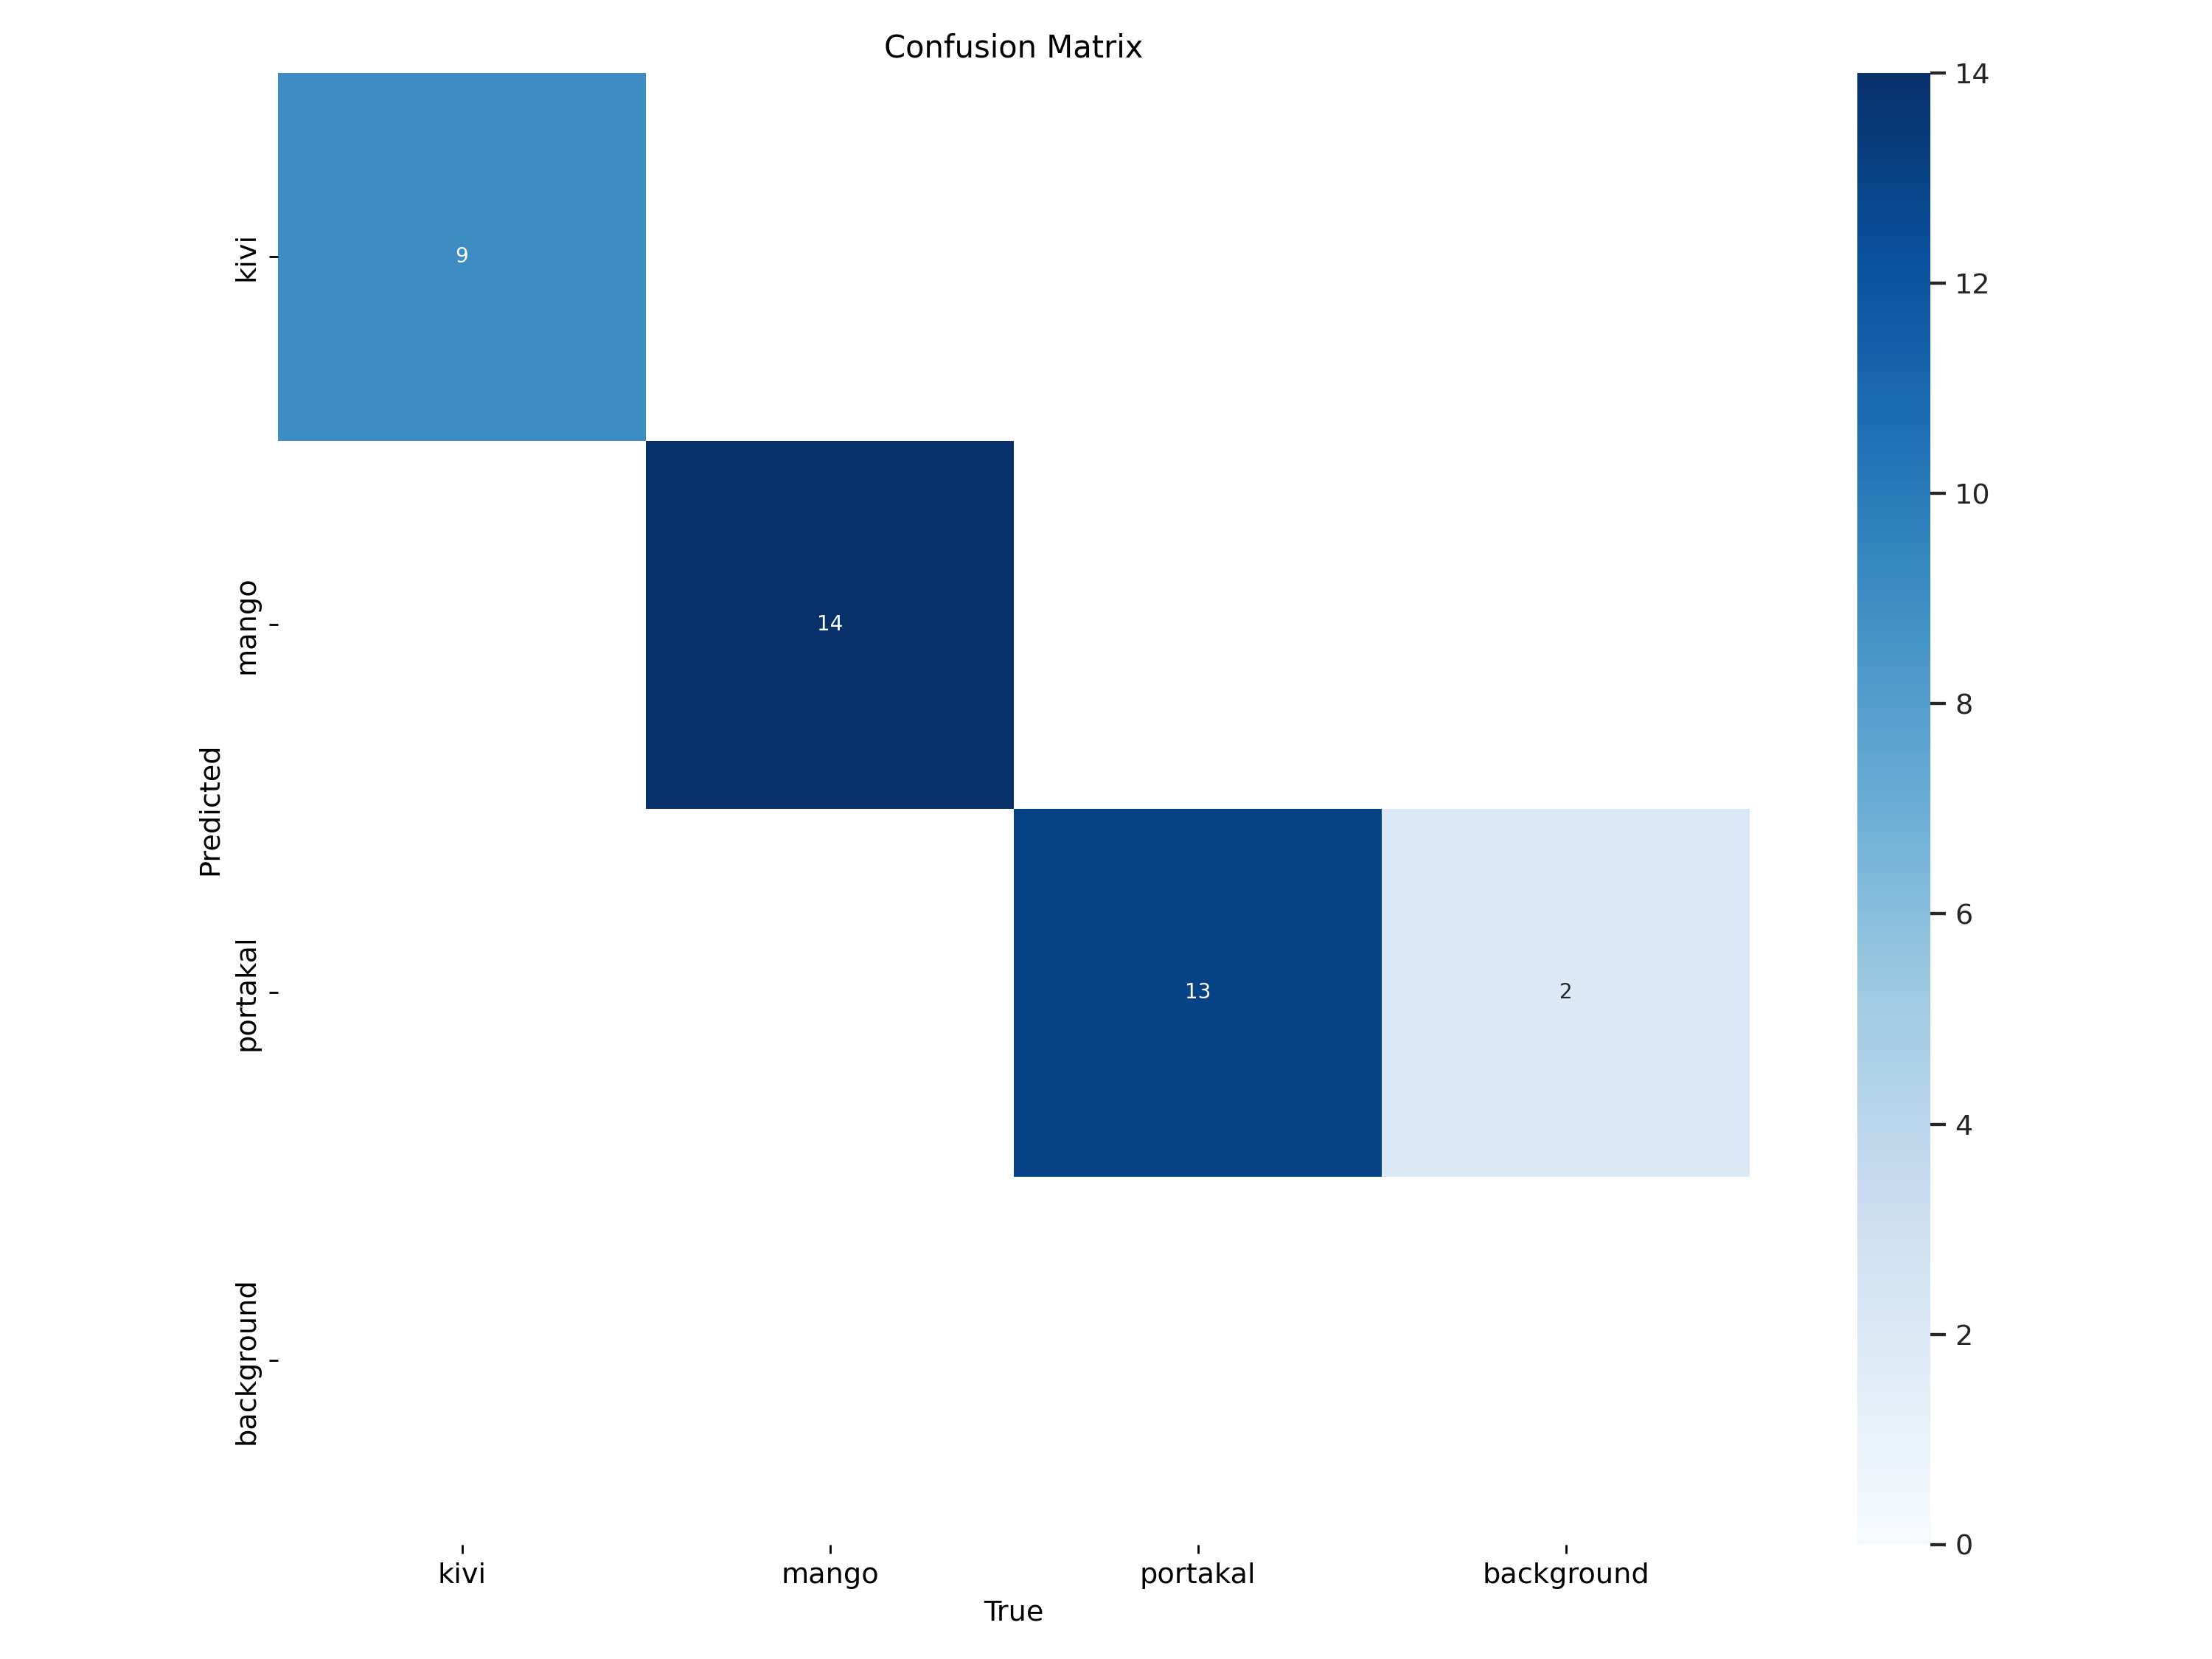

In [45]:
Image(filename=f'runs/segment/train/confusion_matrix.png', width=600)

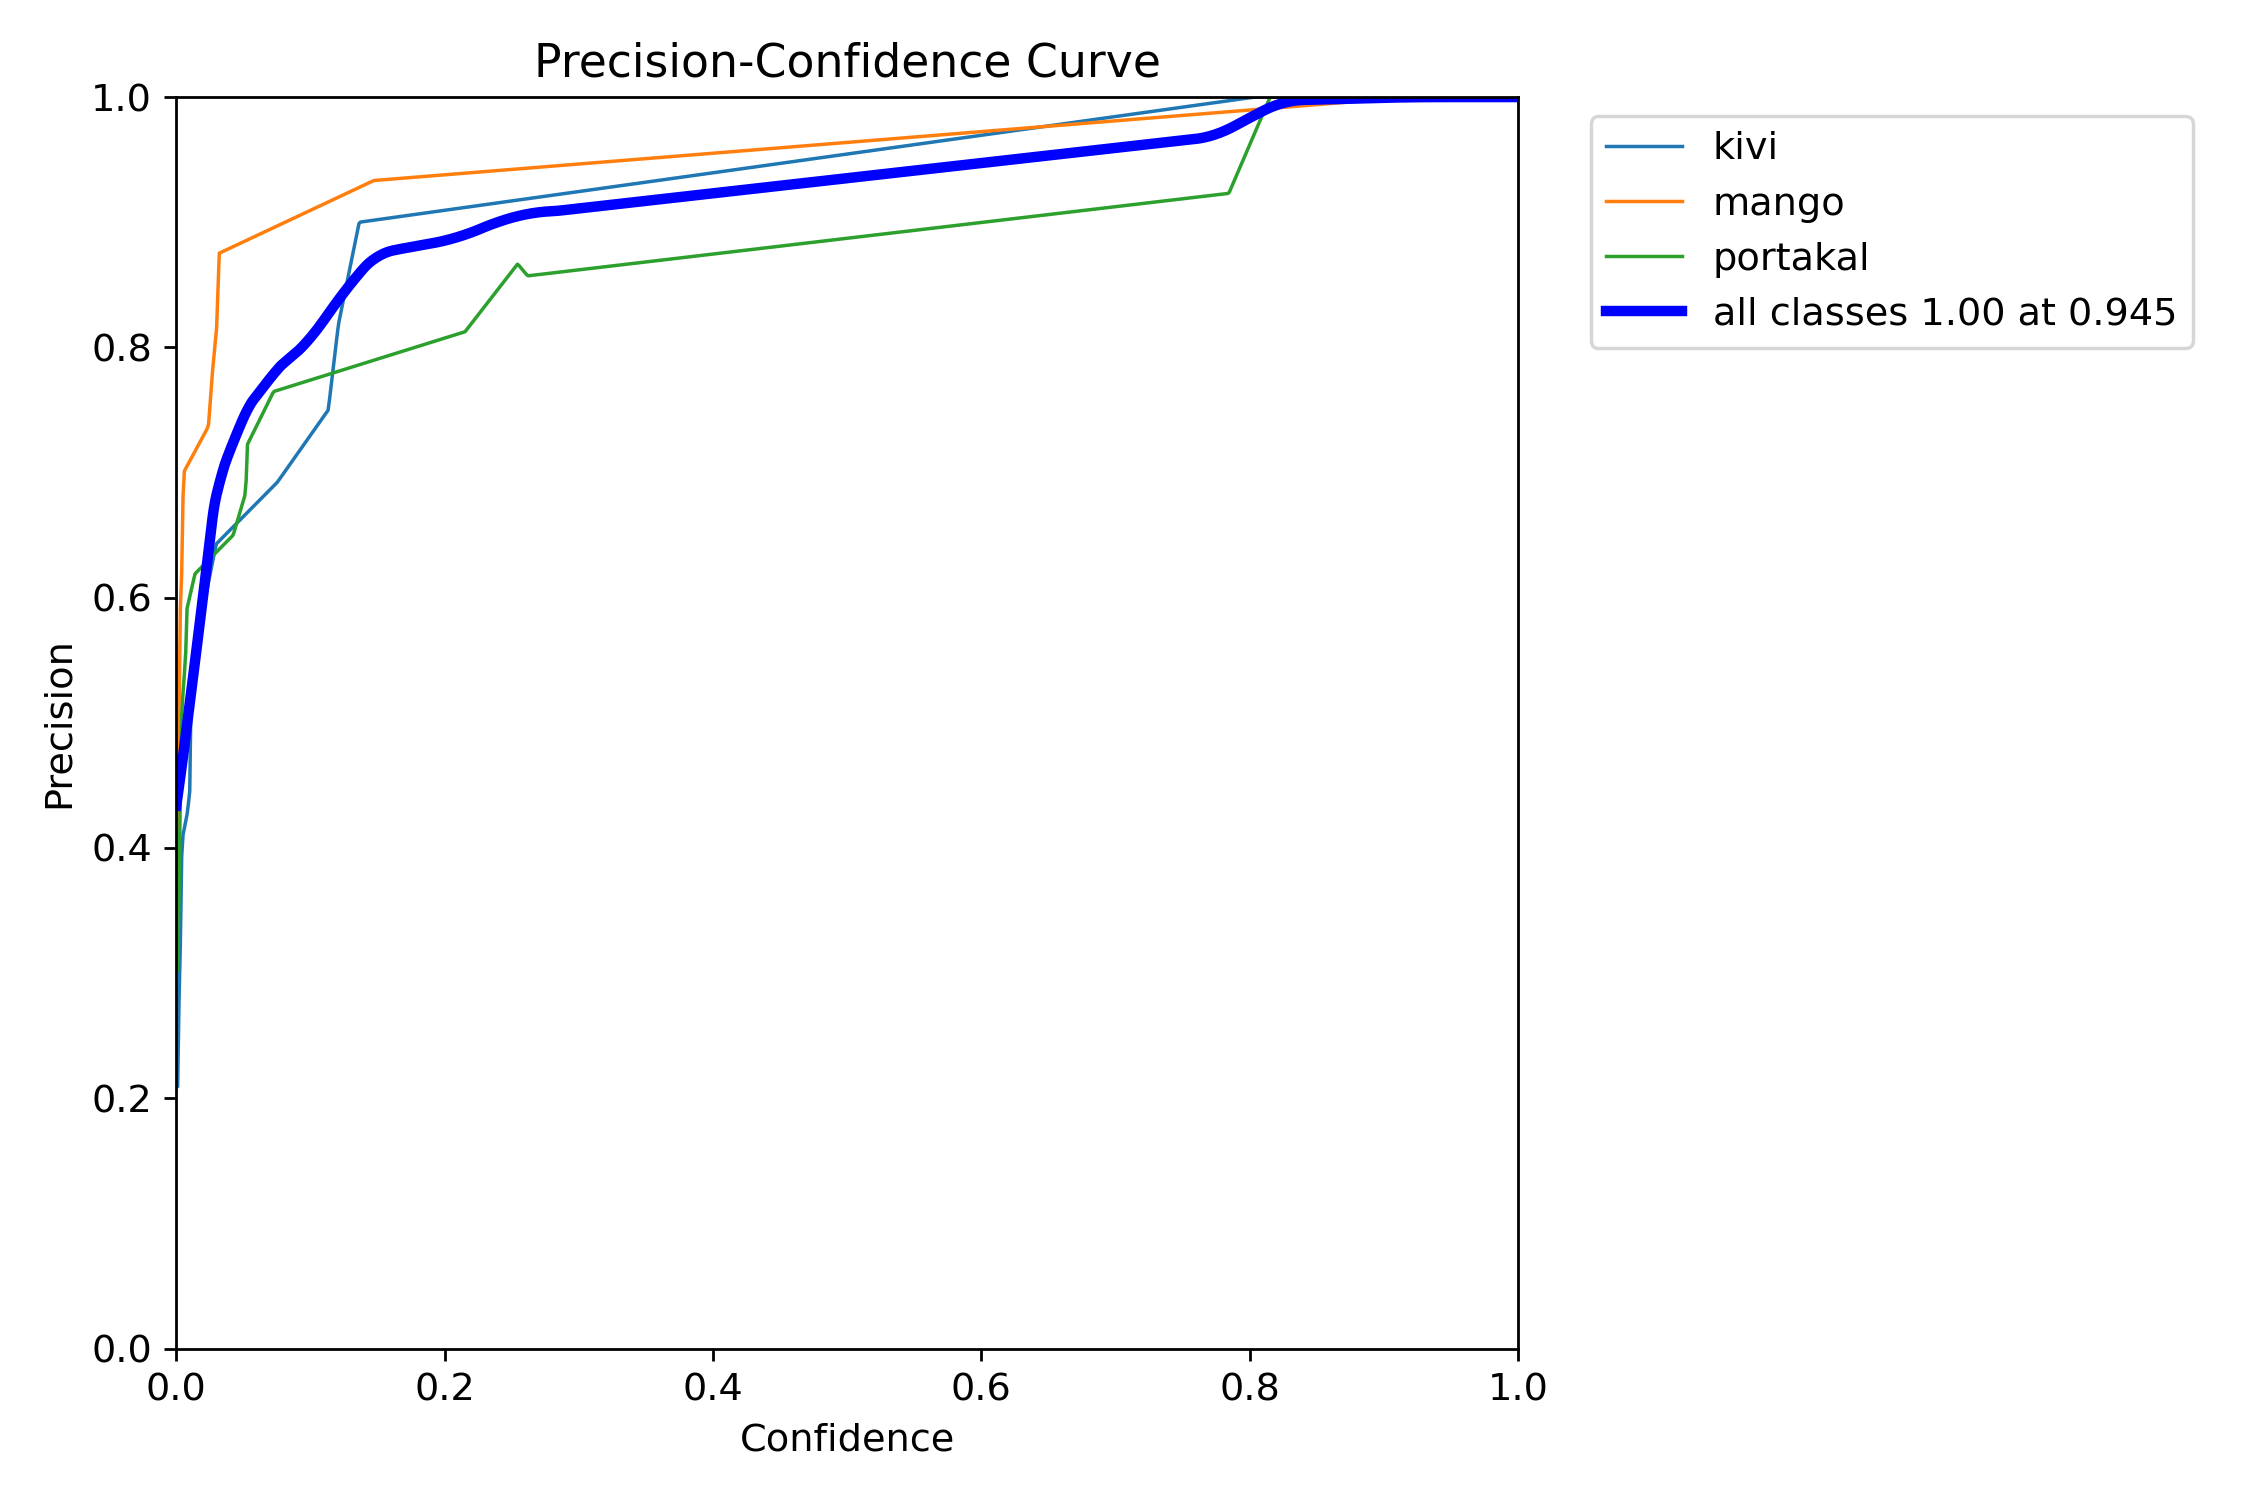

In [7]:
Image(filename=f'/content/drive/MyDrive/inovako_2/runs/segment/val/BoxP_curve.png', width=600)

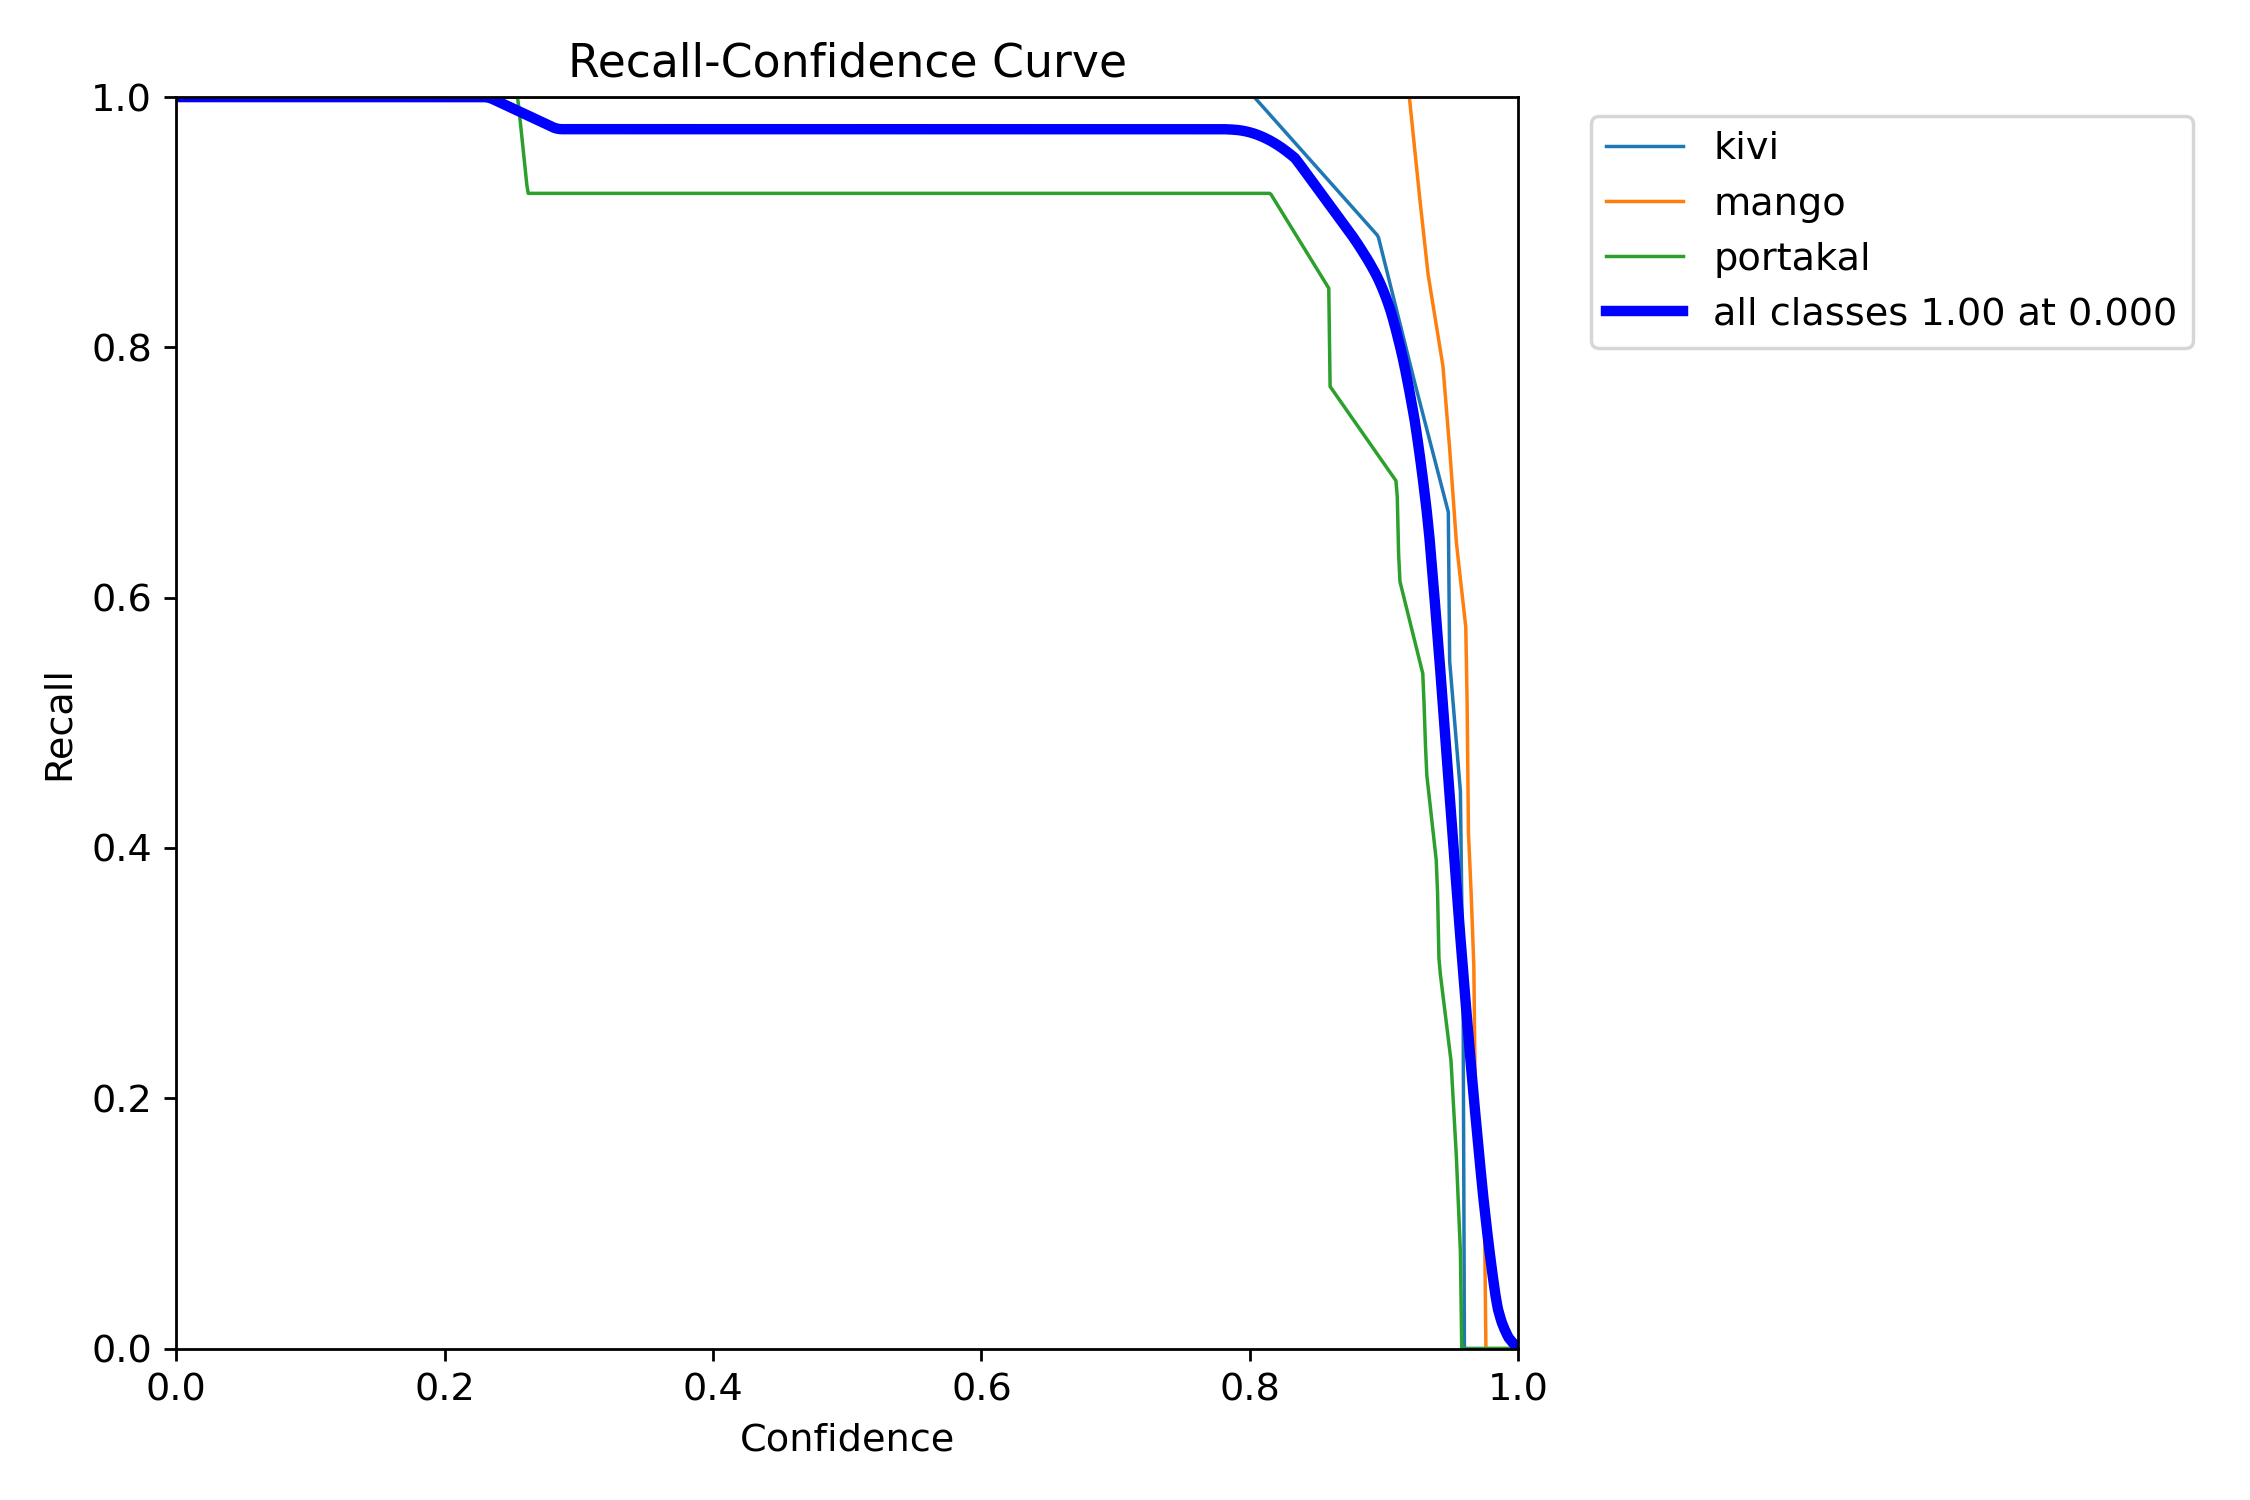

In [8]:
Image(filename=f'/content/drive/MyDrive/inovako_2/runs/segment/val/BoxR_curve.png', width=600)

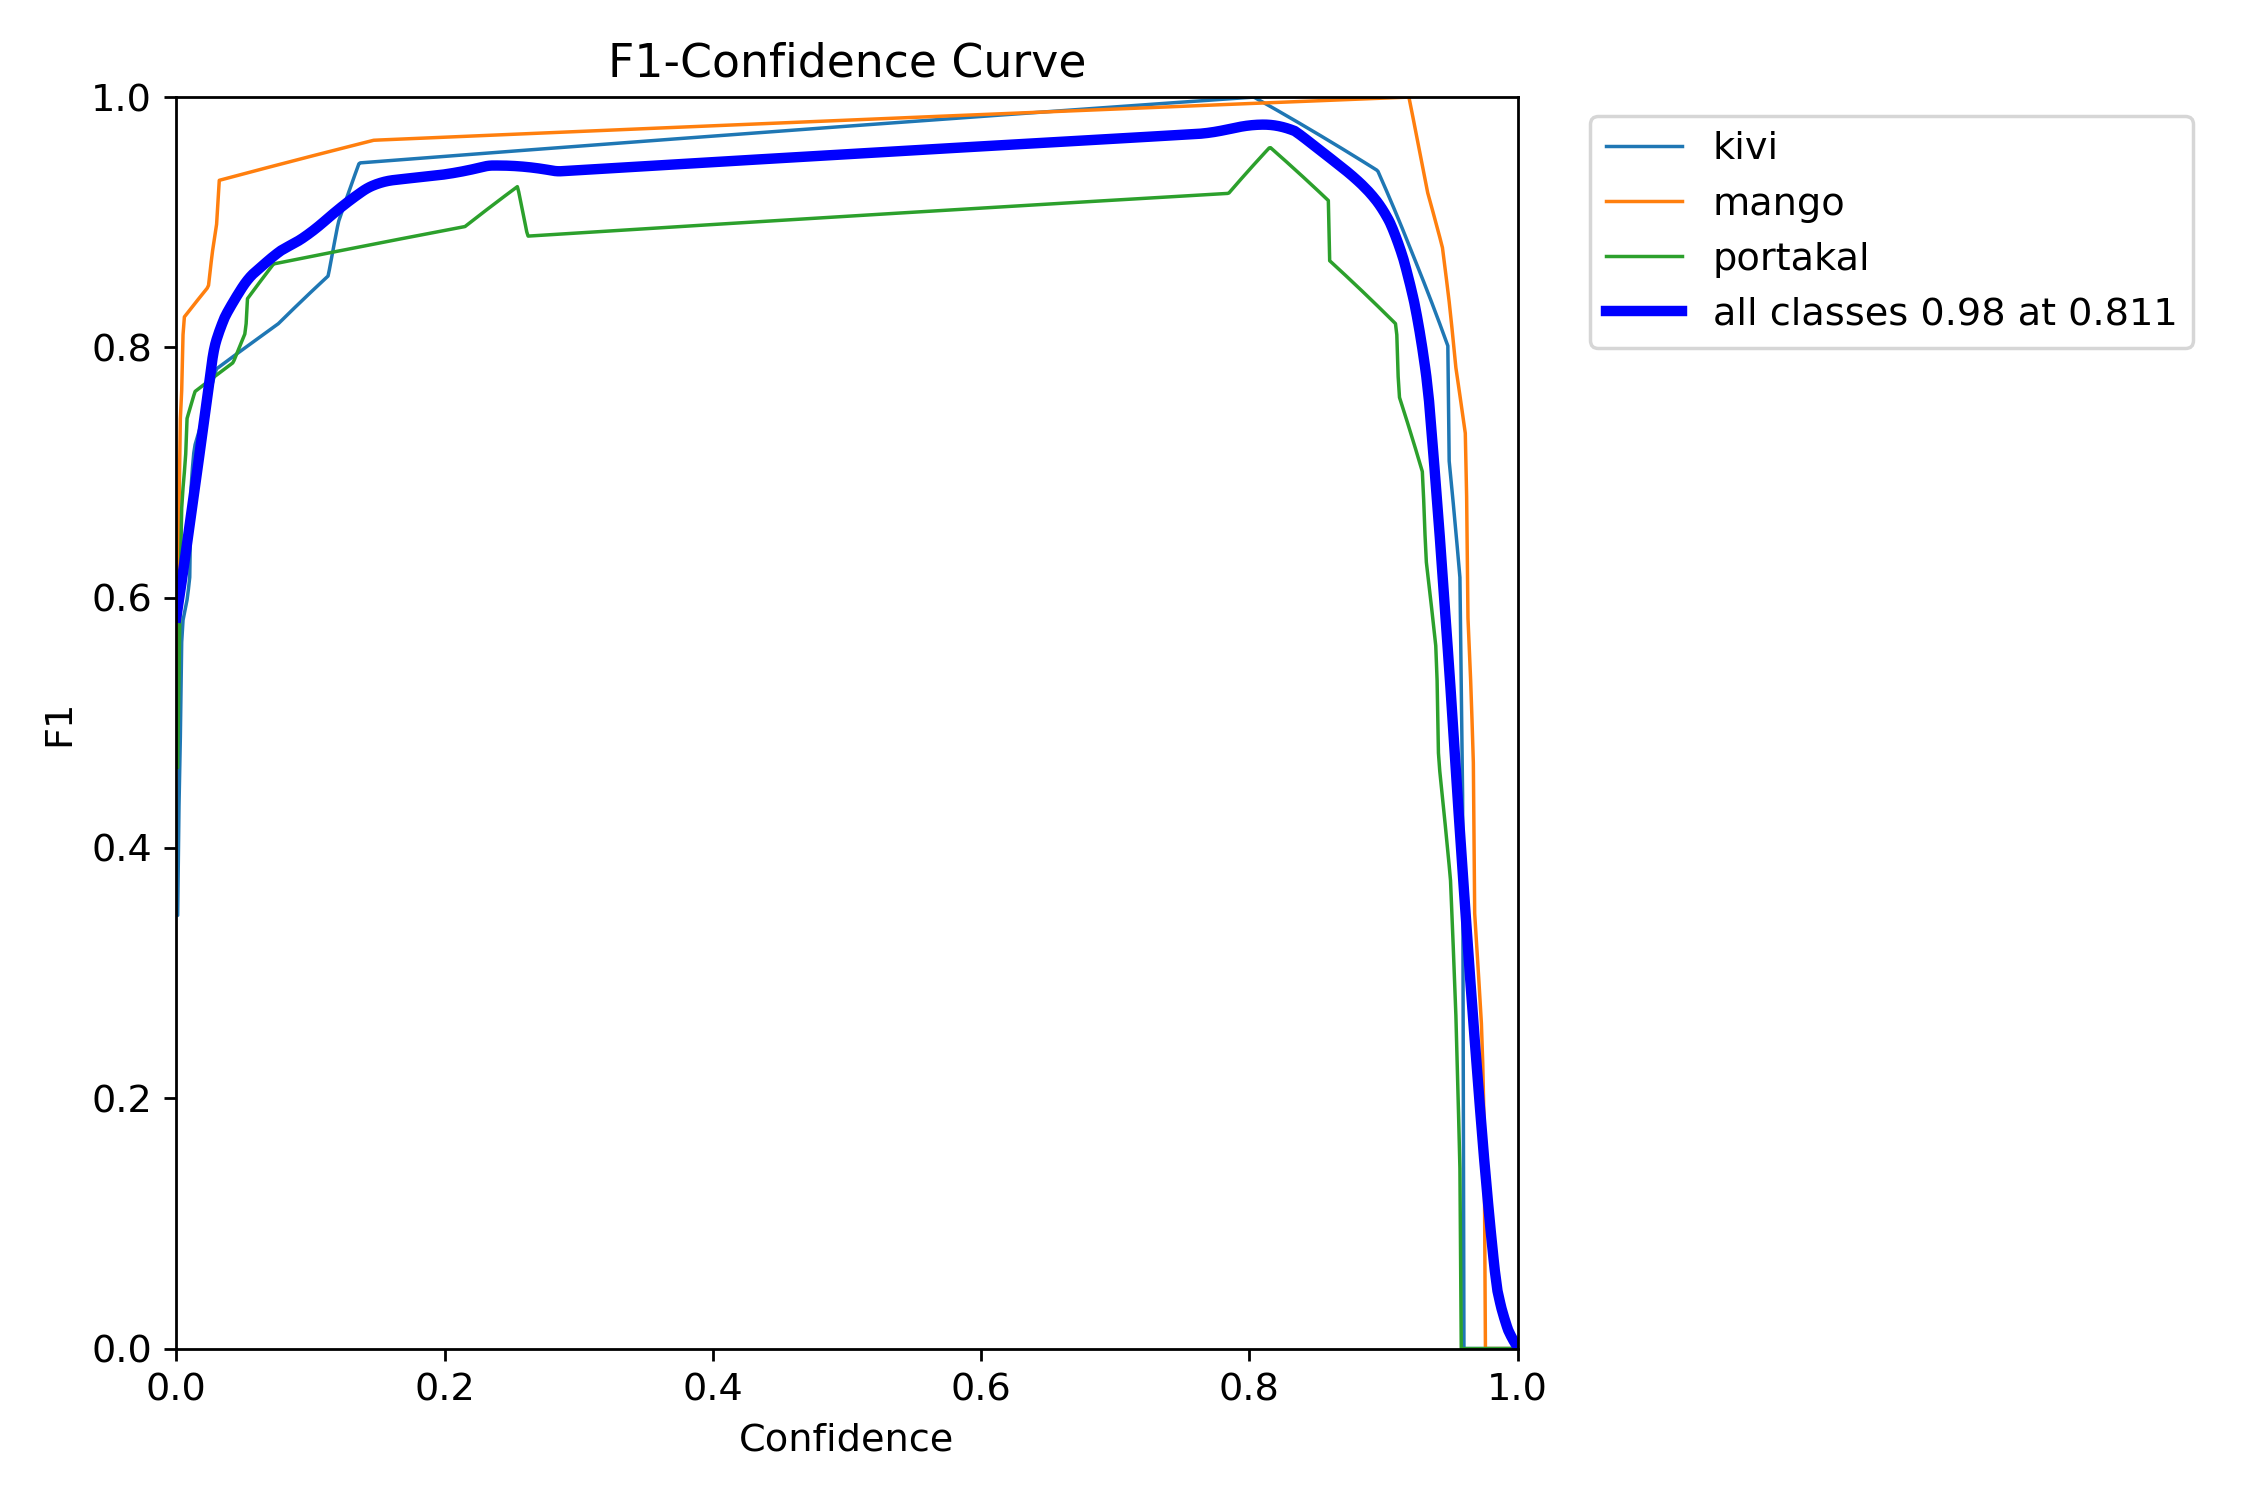

In [6]:
Image(filename=f'/content/drive/MyDrive/inovako_2/runs/segment/val/BoxF1_curve.png', width=600)

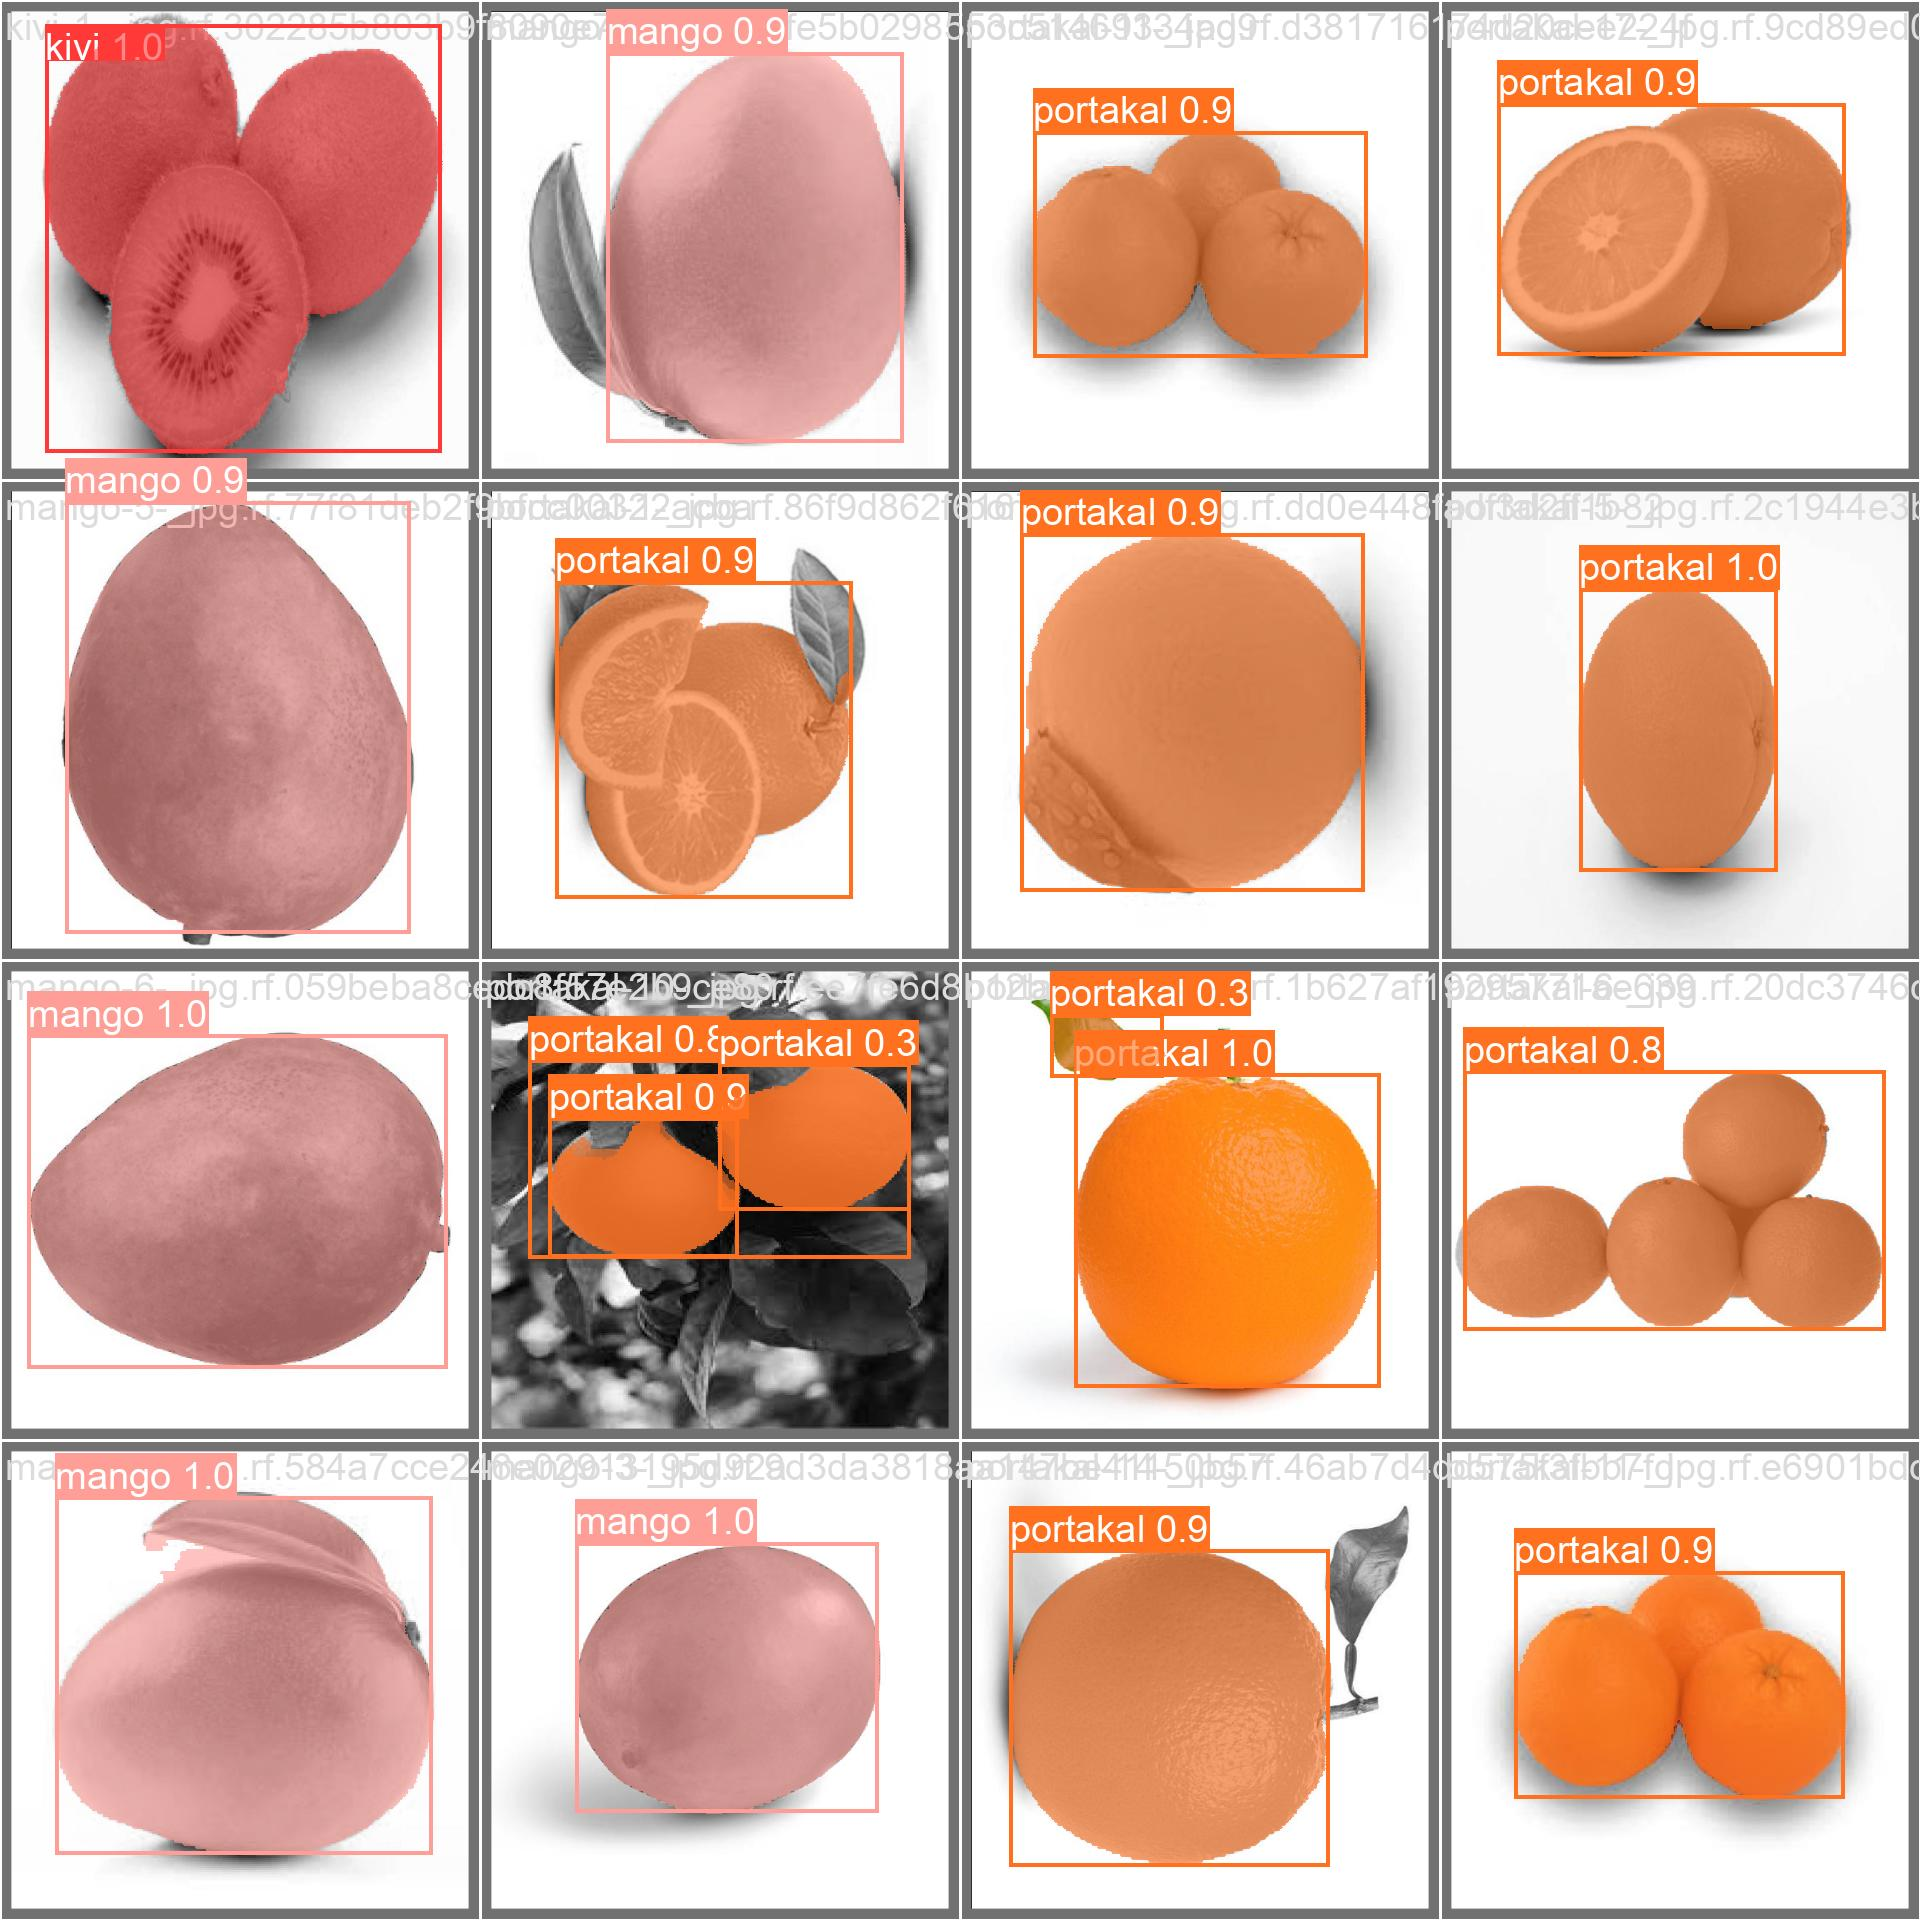

In [47]:
Image(filename=f'runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate the Data

In [48]:
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.160 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/inovako_2/valid/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100% 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.03s/it]
                   all         35         36      0.975      0.974      0.992      0.956      0.991          1      0.995      0.966
                  kivi         35          9      0.998          1      0.995      0.984      0.992          1      0.995      0.995
                 mango         35         14      0.989          1      0.995      0.933      0.985          1      0.995      0.961
              portakal         35         13      0.939      0.923      0.986      0.952      0.995          1      0.995      0.942
Spee

##Inference on Test-set

In [54]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/inovako_2/test/images

Ultralytics YOLOv8.0.160 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients

image 1/5 /content/drive/MyDrive/inovako_2/test/images/kivi16_jpeg.rf.f627dbb2e7f168b292fc1acde288afd7.jpg: 640x640 1 kivi, 21.1ms
image 2/5 /content/drive/MyDrive/inovako_2/test/images/kivi5_jpeg.rf.e8610a42a54de4d4b01b422889e2c115.jpg: 640x640 1 kivi, 21.0ms
image 3/5 /content/drive/MyDrive/inovako_2/test/images/mango11_jpeg.rf.21da1fa7d4c5e2b5556a77e152a17227.jpg: 640x640 1 mango, 20.9ms
image 4/5 /content/drive/MyDrive/inovako_2/test/images/portakal3_png.rf.cbe82542c0ee9e229a4218725ee594d1.jpg: 640x640 2 portakals, 20.9ms
image 5/5 /content/drive/MyDrive/inovako_2/test/images/portakal6_jpeg.rf.da1e103386186c008feb237b3391ffc0.jpg: 640x640 1 portakal, 20.9ms
Speed: 1.7ms preprocess, 21.0ms inference, 19.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict3


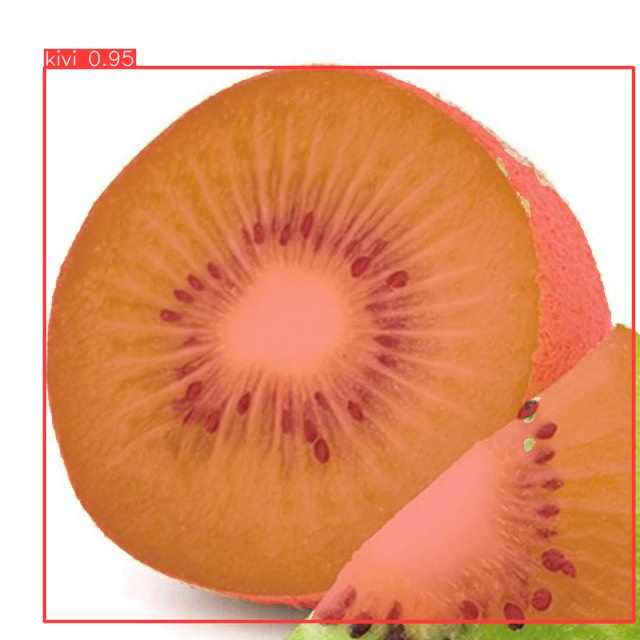

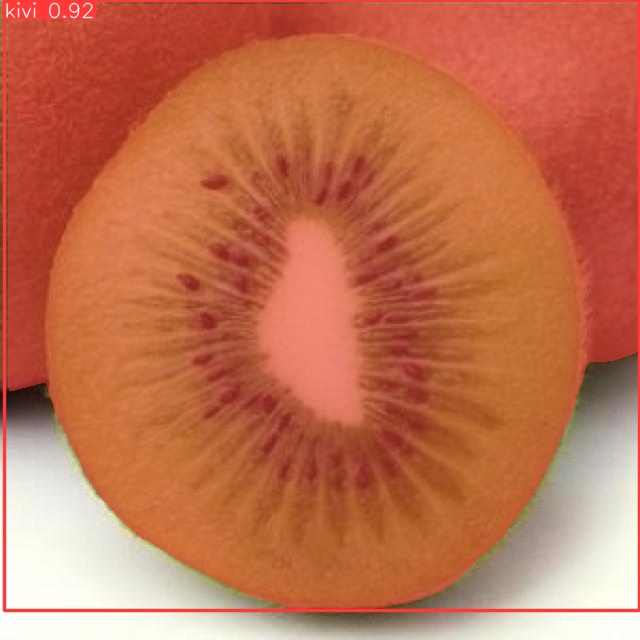

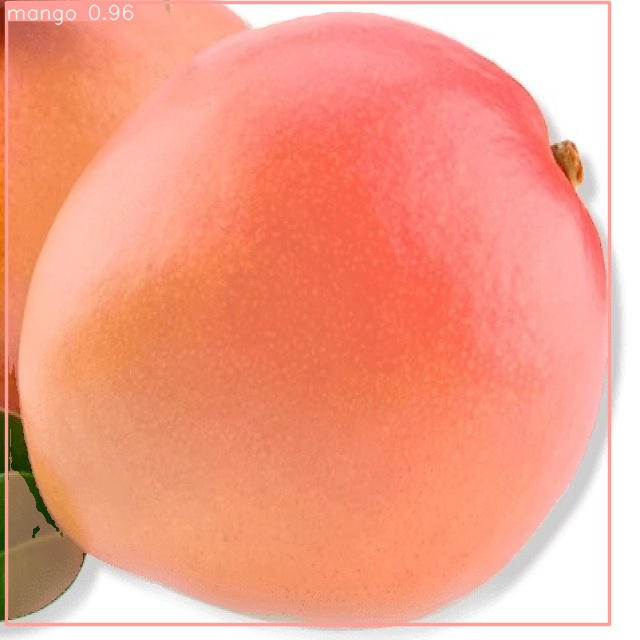

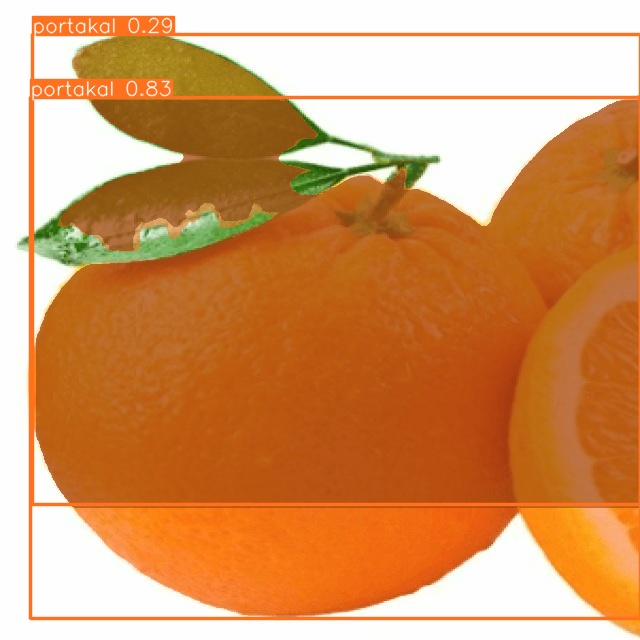

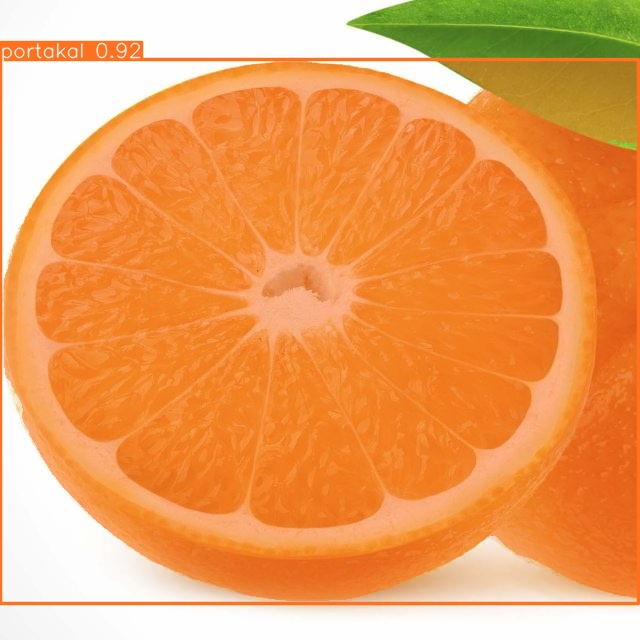

In [57]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict3/*.jpg')[:5]:
      display(Image(filename=image_path, height=600))
      print("\n")